# Data Assignment 

How is participating during the elections on Twitter?? 

- Compared to Arcom/CSA dataset [here](https://www.csa.fr/Proteger/Garantie-des-droits-et-libertes/Proteger-le-pluralisme-politique/La-presidentielle-2022)
- Compared to Factiva dataset: only the distribution???


**Before, we were assigning the week number instead of the date. Instead, we keep the date and compare the same date ranges for the tweets as in Factiva and Arcom datasets**

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime

import seaborn as sns

from os import listdir
from os.path import isfile, join


#Parsing:
import dateparser # $ pip install dateparser

## Twitter

### Accounts of the French Presidential candidates

Do we use Macron??

No political party for Lassale. 

In [43]:
twitter_candidates={'zemmour': ['@ZemmourEric', '@Reconquete2022'], 
                    'le_pen':['@MLP_officiel', '@RNational_off'], 
                   'roussel': ['@Fabien_Roussel', '@PCF'], 
                   'melenchon' : ['@JLMelenchon', '@FranceInsoumise'], 
                   'jadot':['@yjadot', '@EELV'], 
                   'hidalgo':['@Anne_Hidalgo', '@partisocialiste'], 
                   'pecresse':['@vpecresse', '@lesRepublicains'], 
                   'poutou':['@PhilippePoutou', '@NPA_officiel'], 
                   'arthaud':['@n_arthaud', '@LutteOuvriere'],
                   'lassale':['@jeanlassalle'], 
                   'dupont_aignan':['@dupontaignan', '@DLF_Officiel']}

We can then retrieve the tweets mentionning them, using several conditions:
- Date until:2022-03-14 since:2022-01-01
- number of retweets: >100

### Retrieving tweets using Minet - Medialab tool

[Minet & Twitter documentation](https://github.com/medialab/minet/blob/master/docs/twitter.md)

[Twitter advanced search doc](https://twitter.com/search-advanced?f=live)

In [15]:
import minet
from minet.twitter import TwitterAPIScraper
scraper = TwitterAPIScraper()

In [16]:
def retrieve_tweets_cont_username(username):
    """
    @Inputs: username, str
    
    @Outputs: list of tweets
    """

    #Initialising a temp list:
    l_temp = []
    #Retriving the tweets containing the username:
    
    query = str('('+username+') min_retweets:100 until:2022-03-14 since:2022-01-01')
    #(#zemmour2022) min_retweets:100 until:2022-03-15 since:2022-01-01'):
    
    for tweet in scraper.search_tweets(query):
        l_temp.append(tweet)
    return l_temp


def create_df_from_tweets(l_temp, candidate):
    """
    @Inputs: 
        - l_temp, list of tweets (raw)
    
    @Outputs: 
        - df, clean, with tweets and candidate
    """
    
    
    #We are using the keys not containing any list:
    list_keys=['id', 'local_time', 'timestamp_utc', 'text', 'url', 'quoted_id', 'quoted_user', 'quoted_user_id', 
               'quoted_timestamp_utc', 'retweeted_id', 'retweeted_user', 'retweeted_user_id', 'retweeted_timestamp_utc', 
               'links_to_resolve', 'collection_time', 'match_query', 'coordinates', 
               'to_tweetid', 'to_username', 'to_userid', 'lang', 'possibly_sensitive', 'retweet_count', 'like_count', 
               'reply_count', 'user_id', 'user_screen_name', 'user_name', 'user_friends', 'user_followers', 
               'user_location', 'user_verified', 'user_description', 'user_created_at', 'user_tweets', 'user_likes', 
               'user_lists', 'user_image', 'user_url', 'user_timestamp_utc', 'source_url', 'source_name']
    
    #Init an empty dataframe:
    df_ = pd.DataFrame()
    #Loop over the raw tweets in l_temp
    for el in l_temp:
        #Creating an empty dict
        dict_temp={}
        #Looping over the selected keys
        for k in list_keys:
            #If the key exist, we retrieve the element 
            try:
                dict_temp[k]=el[k]
            #Else
            except:
                #do nothing
                pass
        #Creating an empty dataframe of only one row (the tweet we are looping over from el in df_temp)
        df_temp=pd.DataFrame(data=[dict_temp])
        #Concat the previously treated tweets and the new one
        df_=pd.concat([df_, df_temp])
        
    #Indicating the candidate's name:
    df_['candidate']=candidate
    
    #We can return the DataFrame:
    return df_

### Applying the functions

In [50]:
def main_tweets():
    df_tweets = pd.DataFrame()
    for candidate in twitter_candidates.keys():
        print('-----------------------')
        print(candidate)
        for username in twitter_candidates[candidate]:
            print(username)
            l_temp = retrieve_tweets_cont_username(username)
            print(len(l_temp))
            df_ = create_df_from_tweets(l_temp, candidate)
            df_tweets = pd.concat([df_tweets, df_])
    return df_tweets

In [52]:
%time df_tweets = main_tweets()

-----------------------
zemmour
@ZemmourEric
3838
@Reconquete2022
260
-----------------------
le_pen
@MLP_officiel
1229
@RNational_off
163
-----------------------
roussel
@Fabien_Roussel
314
@PCF
31
-----------------------
melenchon
@JLMelenchon
2546
@FranceInsoumise
115
-----------------------
jadot
@yjadot
315
@EELV
27
-----------------------
hidalgo
@Anne_Hidalgo
297
@partisocialiste
27
-----------------------
pecresse
@vpecresse
1074
@lesRepublicains
230
-----------------------
poutou
@PhilippePoutou
127
@NPA_officiel
7
-----------------------
arthaud
@n_arthaud
24
@LutteOuvriere
1
-----------------------
lassale
@jeanlassalle
21
-----------------------
dupont_aignan
@dupontaignan
224
@DLF_Officiel
1
Wall time: 8min 9s


,id,local_time,timestamp_utc,text,url,quoted_id,quoted_user,quoted_user_id,quoted_timestamp_utc,retweeted_id,...,user_tweets,user_likes,user_lists,user_image,user_url,user_timestamp_utc,source_url,source_name,possibly_sensitive,candidate
0,1503136657918377990,2022-03-13T22:31:20,1647210680,En ces #48HdelaReconquete j'ai décroché mon té...,https://twitter.com/AnthoMICHEL54/statuses/150...,None,None,None,None,None,...,3223,13286,0,https://pbs.twimg.com/profile_images/146737661...,None,1503569278,https://mobile.twitter.com,Twitter Web App,NaN,zemmour
0,1503134684427042816,2022-03-13T22:23:30,1647210210,@ZemmourEric à réussi à rassembler 3 génératio...,https://twitter.com/sco_pan/statuses/150313468...,None,None,None,None,None,...,11803,13546,9,https://pbs.twimg.com/profile_images/150335820...,None,1377270078,http://twitter.com/download/android,Twitter for Android,False,zemmour
0,1503131518641836041,2022-03-13T22:10:55,1647209455,Merci à mes militants pour ces #48HdelaReconqu...,https://twitter.com/ZemmourEric/statuses/15031...,None,None,None,None,None,...,5949,613,1193,https://pbs.twimg.com/profile_images/150414107...,https://www.zemmour2022.fr/,1570983990,http://twitter.com/download/iphone,Twitter for iPhone,False,zemmour
0,1503131150436519947,2022-03-13T22:09:27,1647209367,35 ans que la France attend une véritable cand...,https://twitter.com/Marie_Lin777/statuses/1503...,None,None,None,None,None,...,29269,7123,52,https://pbs.twimg.com/profile_images/149880365...,None,1315855544,https://mobile.twitter.com,Twitter Web App,NaN,zemmour
0,1503123918961393670,2022-03-13T21:40:43,1647207643,Ce week end à Paris se tenait un meeting de so...,https://twitter.com/Portes_Thomas/statuses/150...,None,None,None,None,None,...,34831,7992,280,https://pbs.twimg.com/profile_images/150292750...,https://thomasportes.com,1394549893,http://twitter.com/download/iphone,Twitter for iPhone,NaN,zemmour
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1477595526992478210,2022-01-02T11:00:00,1641121200,Scandaleux ! Sebastien Huyghe (LR) propose en ...,https://twitter.com/dupontaignan/statuses/1477...,None,None,None,None,None,...,24222,744,2005,https://pbs.twimg.com/profile_images/672054572...,http://www.2022nda.fr,1241614288,https://mobile.twitter.com,Twitter Web App,False,dupont_aignan
0,1477315236931715073,2022-01-01T16:26:14,1641054374,Face à ce gouv. qui ne maîtrise rien #Covid_19...,https://twitter.com/MartineWonner/statuses/147...,None,None,None,None,None,...,3187,13951,527,https://pbs.twimg.com/profile_images/147355620...,https://www.martinewonner.fr/,1496310697,http://twitter.com/download/android,Twitter for Android,False,dupont_aignan
0,1477305376731238408,2022-01-01T15:47:03,1641052023,900 #voitures ont #brûlé pendant la nuit de la...,https://twitter.com/dupontaignan/statuses/1477...,None,None,None,None,None,...,24222,744,2005,https://pbs.twimg.com/profile_images/672054572...,http://www.2022nda.fr,1241614288,http://twitter.com/download/iphone,Twitter for iPhone,NaN,dupont_aignan
0,1477278435613446146,2022-01-01T14:00:00,1641045600,"✍🏻Je vous invite, au nom de nos libertés à sig...",https://twitter.com/dupontaignan/statuses/1477...,None,None,None,None,None,...,24222,744,2005,https://pbs.twimg.com/profile_images/672054572...,http://www.2022nda.fr,1241614288,https://mobile.twitter.com,Twitter Web App,False,dupont_aignan


In [53]:
%time df_tweets = main_tweets()

-----------------------
zemmour
@ZemmourEric
3838
@Reconquete2022
259
-----------------------
le_pen
@MLP_officiel
1229
@RNational_off
163
-----------------------
roussel
@Fabien_Roussel
314
@PCF
31
-----------------------
melenchon
@JLMelenchon
2543
@FranceInsoumise
115
-----------------------
jadot
@yjadot
315
@EELV
27
-----------------------
hidalgo
@Anne_Hidalgo
297
@partisocialiste
27
-----------------------
pecresse
@vpecresse
1074
@lesRepublicains
230
-----------------------
poutou
@PhilippePoutou
127
@NPA_officiel
7
-----------------------
arthaud
@n_arthaud
24
@LutteOuvriere
1
-----------------------
lassale
@jeanlassalle
21
-----------------------
dupont_aignan
@dupontaignan
224
@DLF_Officiel
1
Wall time: 8min 7s


In [54]:
#Saving df_tweets as csv:
df_tweets.to_csv('data/tweets/df_tweets_16032022.csv')

In [59]:
df_tweets.shape

(10867, 43)

### Importing tweets

In [3]:
df_tweets = pd.read_csv('data/tweets/df_tweets_16032022.csv')

In [4]:
df_tweets.columns

Index(['Unnamed: 0', 'id', 'local_time', 'timestamp_utc', 'text', 'url',
       'quoted_id', 'quoted_user', 'quoted_user_id', 'quoted_timestamp_utc',
       'retweeted_id', 'retweeted_user', 'retweeted_user_id',
       'retweeted_timestamp_utc', 'links_to_resolve', 'collection_time',
       'match_query', 'coordinates', 'to_tweetid', 'to_username', 'to_userid',
       'lang', 'retweet_count', 'like_count', 'reply_count', 'user_id',
       'user_screen_name', 'user_name', 'user_friends', 'user_followers',
       'user_location', 'user_verified', 'user_description', 'user_created_at',
       'user_tweets', 'user_likes', 'user_lists', 'user_image', 'user_url',
       'user_timestamp_utc', 'source_url', 'source_name', 'possibly_sensitive',
       'candidate'],
      dtype='object')

In [5]:
df_tweets.head()

,Unnamed: 0,id,local_time,timestamp_utc,text,url,quoted_id,quoted_user,quoted_user_id,quoted_timestamp_utc,...,user_tweets,user_likes,user_lists,user_image,user_url,user_timestamp_utc,source_url,source_name,possibly_sensitive,candidate
0,0,1503136657918377990,2022-03-13T22:31:20,1647210680,En ces #48HdelaReconquete j'ai décroché mon té...,https://twitter.com/AnthoMICHEL54/statuses/150...,NaN,NaN,NaN,NaN,...,3223,13286,0,https://pbs.twimg.com/profile_images/146737661...,NaN,1503569278,https://mobile.twitter.com,Twitter Web App,NaN,zemmour
1,0,1503134684427042816,2022-03-13T22:23:30,1647210210,@ZemmourEric à réussi à rassembler 3 génératio...,https://twitter.com/sco_pan/statuses/150313468...,NaN,NaN,NaN,NaN,...,11803,13546,9,https://pbs.twimg.com/profile_images/150335820...,NaN,1377270078,http://twitter.com/download/android,Twitter for Android,False,zemmour
2,0,1503131518641836041,2022-03-13T22:10:55,1647209455,Merci à mes militants pour ces #48HdelaReconqu...,https://twitter.com/ZemmourEric/statuses/15031...,NaN,NaN,NaN,NaN,...,5949,613,1193,https://pbs.twimg.com/profile_images/150414107...,https://www.zemmour2022.fr/,1570983990,http://twitter.com/download/iphone,Twitter for iPhone,False,zemmour
3,0,1503131150436519947,2022-03-13T22:09:27,1647209367,35 ans que la France attend une véritable cand...,https://twitter.com/Marie_Lin777/statuses/1503...,NaN,NaN,NaN,NaN,...,29269,7123,52,https://pbs.twimg.com/profile_images/149880365...,NaN,1315855544,https://mobile.twitter.com,Twitter Web App,NaN,zemmour
4,0,1503123918961393670,2022-03-13T21:40:43,1647207643,Ce week end à Paris se tenait un meeting de so...,https://twitter.com/Portes_Thomas/statuses/150...,NaN,NaN,NaN,NaN,...,34831,7992,280,https://pbs.twimg.com/profile_images/150292750...,https://thomasportes.com,1394549893,http://twitter.com/download/iphone,Twitter for iPhone,NaN,zemmour


#### Simple clean:

In [8]:
#Selected_cols:
selected_tweet_cols = ['id', 'local_time', 'retweet_count', 'like_count', 'reply_count', 'candidate']

df_tweets_clean = df_tweets[selected_tweet_cols].copy()

#To datetime:
df_tweets_clean['day'] = pd.to_datetime(df_tweets_clean['local_time']).dt.date


#Retrieving week number and checking the year:
#df_tweets_clean['n_week'] = df_tweets_clean['local_time'].apply(lambda x: x.isocalendar()[1])
df_tweets_clean['year'] = df_tweets_clean['day'].apply(lambda x: x.isocalendar()[0])

#Slicing 2022:
df_tweets_clean = df_tweets_clean[df_tweets_clean['year']==2022]

#Grouping by candidate and week number and suming:
df_tweets_clean = df_tweets_clean.groupby(['candidate', 'day']).agg(
    {'id':'count', 'retweet_count': 'sum', 'like_count':'sum', 'reply_count':'sum'})\
.reset_index().rename(columns={'id':'tweet_count'})

### Saving tweets

In [10]:
df_tweets_clean.to_csv('data/clean_df_tweets.csv', index=False)

## Tweets - 10 RT

In [44]:
#Listing all the files in the folder:
rel_path_tweets_10RT = 'data/tweets/10'
files_tweets_10RT = [f for f in listdir(rel_path_tweets_10RT) if isfile(join(rel_path_tweets_10RT, f))]
#Initializing a pd df:
df_tweets_10RT = pd.DataFrame()
for f in files_tweets_10RT:
    df_temp = pd.read_csv(rel_path_tweets_10RT+'/'+f)
    #Concat:
    df_tweets_10RT = pd.concat([df_tweets_10RT, df_temp])

#### Simple clean:

In [12]:
#Selected_cols:
selected_tweet_cols = ['id', 'local_time', 'retweet_count', 'like_count', 'reply_count', 'candidate']

df_tweets_clean = df_tweets_10RT[selected_tweet_cols].copy()

#To datetime:
df_tweets_clean['day'] = pd.to_datetime(df_tweets_clean['local_time']).dt.date


#Retrieving week number and checking the year:
#df_tweets_clean['n_week'] = df_tweets_clean['local_time'].apply(lambda x: x.isocalendar()[1])
df_tweets_clean['year'] = df_tweets_clean['day'].apply(lambda x: x.isocalendar()[0])

#Slicing 2022:
df_tweets_clean = df_tweets_clean[df_tweets_clean['year']==2022]

#Grouping by candidate and week number and suming:
df_tweets_clean = df_tweets_clean.groupby(['candidate', 'day']).agg(
    {'id':'count', 'retweet_count': 'sum', 'like_count':'sum', 'reply_count':'sum'})\
.reset_index().rename(columns={'id':'tweet_count'})

### Saving tweets

In [13]:
df_tweets_clean.to_csv('data/clean_df_tweets_10RT.csv', index=False)

## Factiva

"Prénom nom"

Du 01/01/2022 au 14/03/2022

Rechercher en texte libre dans: "Titre et premier paragraphe"

Doublons: "similaire"


**Pour L'instant: TOUS LES DOCUMENTS!!!**

--> il faudrait peut-être faire des distinctions (Publications papier/sites web....)

In [14]:
#Initializing a pandas DF for Factiva:
df_factiva_aggregated = pd.DataFrame()

#Listing all the files in the folder:
rel_path_factiva = 'data/factiva'
files_factiva = [f for f in listdir(rel_path_factiva) if isfile(join(rel_path_factiva, f))]

#Looping over the files:
for f_factiva in files_factiva:
    name = f_factiva.split('_')[1].split('.')[0]
    #Retrieving the data - we have to skip some rows
    df_temp = pd.read_csv(rel_path_factiva+'/'+f_factiva, sep = ',', skiprows=4)
    
    #We also have to delete foot rows:
    #Localizing the end: 
    loc_end = df_temp[df_temp['Date']=='Sommaire de la recherche'].index[0]
    #Only selecting the right data:
    df_temp = df_temp.loc[:loc_end-1].copy()
    #Specifying the candate's name:
    df_temp['candidat']=name
    #Concat:
    df_factiva_aggregated = pd.concat([df_factiva_aggregated, df_temp]).reset_index(drop=True)

In [15]:
df_factiva_aggregated.sample(10)

,Date,Nombres de documents,candidat
96,Date de début: 3 janvier 2022 Date de fin: 9 j...,812,pecresse
29,Date de début: 7 février 2022 Date de fin: 13 ...,357,hidalgo
53,Date de début: 7 février 2022 Date de fin: 13 ...,51,lassale
38,Date de début: 17 janvier 2022 Date de fin: 23...,408,jadot
111,Date de début: 31 janvier 2022 Date de fin: 6 ...,47,poutou
82,Date de début: 14 mars 2022 Date de fin: 20 ma...,574,macron
75,Date de début: 24 janvier 2022 Date de fin: 30...,3940,macron
85,Date de début: 10 janvier 2022 Date de fin: 16...,493,melenchon
90,Date de début: 14 février 2022 Date de fin: 20...,435,melenchon
51,Date de début: 24 janvier 2022 Date de fin: 30...,16,lassale


We then have to retrieve the dates properly:

In [17]:
#Retrieveing the dates properly:
df_factiva_aggregated[['start_date', 'end_date']] = df_factiva_aggregated['Date'].apply(lambda x: 
                                        pd.Series(x.split('Date de début: ')[1].split(' Date de fin: ')))
#We can now del the 'Date' column:
del df_factiva_aggregated['Date']

In [18]:
#Parsing the dates:
df_factiva_aggregated['start_date'] =  df_factiva_aggregated['start_date'].apply(lambda x:dateparser.parse(x).date())
df_factiva_aggregated['end_date'] =  df_factiva_aggregated['end_date'].apply(lambda x:dateparser.parse(x).date()) 

In [19]:
#Right types:
df_factiva_aggregated['start_date']=pd.to_datetime(df_factiva_aggregated['start_date'])
df_factiva_aggregated['end_date']=pd.to_datetime(df_factiva_aggregated['end_date'])
df_factiva_aggregated['Nombres de documents'] = df_factiva_aggregated['Nombres de documents'].astype(int)


#Week number from end_date:
#df_factiva_aggregated['n_week'] = df_factiva_aggregated['end_date'].apply(lambda x: x.isocalendar()[1])
df_factiva_aggregated['year'] = df_factiva_aggregated['end_date'].apply(lambda x: x.isocalendar()[0])

#Selecting only the year 2022:
df_factiva_aggregated = df_factiva_aggregated[df_factiva_aggregated['year']==2022]

#Creating a new cleaned df:
df_factiva_clean = df_factiva_aggregated.reset_index(drop=True).copy()

In [20]:
df_factiva_clean.head()

,Nombres de documents,candidat,start_date,end_date,year
0,3,arthaud,2022-01-03,2022-01-09,2022
1,14,arthaud,2022-01-10,2022-01-16,2022
2,22,arthaud,2022-01-17,2022-01-23,2022
3,28,arthaud,2022-01-24,2022-01-30,2022
4,29,arthaud,2022-01-31,2022-02-06,2022


### VIZ

In [22]:
plt.figure(figsize = (15,5))
sns.lineplot(x="day", y="Nombres de documents",
             hue="candidat",data=df_factiva_clean)
#Changing the legend's location 
plt.legend(loc = 'upper left')
#Title:
plt.title('Factiva - number of documents')
plt.show()

ValueError: Could not interpret value `day` for parameter `x`

<Figure size 1080x360 with 0 Axes>

### Saving Factiva

In [23]:
df_factiva_clean.to_csv('data/clean/df_factiva.csv', index=False)

## ARCOM / CSA

They can be found on that page: 
https://www.csa.fr/Proteger/Garantie-des-droits-et-libertes/Proteger-le-pluralisme-politique/La-presidentielle-2022

Updated every two weeks, so we can infer the time for every two weeks period, for each considered candidate. 

In [24]:
#The column names are not defined: 
names_arcom_cols = ['network', 'cat_network', 'candidat', 'cat_speaker', 'time', 'percentage']


#Initializing a pandas DF:
df_arcom_aggregated = pd.DataFrame()




#Listing the complete set of data in the folder: 
rel_path= 'data/arcom/renamed'
files_arcom = [f for f in listdir(rel_path) if isfile(join(rel_path, f))]
#Loop over those files and retrieve the data:
for f_name in files_arcom:
    splitted = f_name.split('_')
    day = int(splitted[1])
    month = int(splitted[2].split('.')[0])    
    date_temp= datetime.date(2022, month, day)
    #n_week = date_temp.isocalendar()[1]
    df_temp = pd.read_csv(rel_path+'/'+f_name, 
                sep=';', names=names_arcom_cols,encoding='latin-1')
    df_temp['date_end']=date_temp
    #Concat the df_temp to the whole DF:
    df_arcom_aggregated = pd.concat([df_arcom_aggregated, df_temp])

In [25]:
df_arcom_aggregated.sample(10)

,network,cat_network,candidat,cat_speaker,time,percentage,date_end
1499,FranceInfo,00_NATIONAL,POUTOU PHILIPPE,Total Temps d'antenne,00:24:45,1.04,2022-01-30
444,TMC,00_NATIONAL,PHILIPPOT FLORIAN,Total Temps d'antenne,00:02:24,2.00,2022-01-16
2490,SudRadio,00_NATIONAL,JADOT YANNICK,Candidat,00:10:06,5.58,2022-02-27
1673,RFI,00_NATIONAL,MACRON EMMANUEL,Antenne,00:19:25,15.60,2022-02-27
1146,FranceinfoTV,00_NATIONAL,ROCCA MARTIN,Soutiens,00:00:00,-,2022-01-30
1970,Europe1,00_NATIONAL,JADOT YANNICK,Candidat,00:05:03,0.99,2022-01-30
979,RT France,00_NATIONAL,MELENCHON JEAN LUC,Total Temps d'antenne,03:02:47,9.61,2022-02-27
182,France3,00_NATIONAL,ASSELINEAU FRANCOIS,Total Temps de parole,00:00:40,0.60,2022-01-30
1441,TV5Monde,00_NATIONAL,PECRESSE VALERIE,Soutiens,00:01:12,1.38,2022-02-27
976,RT France,00_NATIONAL,KUZMANOVIC GEORGES,Soutiens,00:00:00,-,2022-03-07


### Clean & lookup

#### Selecting the candidates:

In [26]:
df_arcom_aggregated['candidat'].unique()

array(['ARTHAUD NATHALIE', 'ASSELINEAU FRANCOIS', 'DUPONT AIGNAN NICOLAS',
       'HIDALGO ANNE', 'JADOT YANNICK', 'KAZIB ANASSE', 'KOENIG GASPARD',
       'LASSALLE JEAN', 'LE PEN MARINE', 'MACRON EMMANUEL',
       'MELENCHON JEAN LUC', 'MONTEBOURG ARNAUD', 'PECRESSE VALERIE',
       'PHILIPPOT FLORIAN', 'POUTOU PHILIPPE', 'ROUSSEL FABIEN',
       'TAUBIRA CHRISTIANE', 'THOUY HELENE', 'ZEMMOUR ERIC',
       'Total candidats', 'LARROUTUROU PIERRE', 'CHICHE ARNAUD',
       'DAN ANNE', 'EGGER CLARA', 'FURLAN PHILIPPE',
       'GOVERNATORI JEAN MARC', 'GRIMAL FABRICE', 'KUZMANOVIC GEORGES',
       'LANGLOIS ALEXANDRE', 'RIVOAL STEPHANIE', 'ROCCA MARTIN',
       'WAECHTER ANTOINE', 'MARCHANDISE CHARLOTTE', 'CAU MARIE',
       'AGUEB PORTERIE ANNA', 'DANIEL ISABELLE', 'LAM YAYA',
       'PIGNOL GERARD', 'ASSELINEAU FRANÇOIS'], dtype=object)

In [27]:
selected_candidates_arcom = ['ARTHAUD NATHALIE','DUPONT AIGNAN NICOLAS',
       'HIDALGO ANNE', 'JADOT YANNICK','LASSALLE JEAN', 'LE PEN MARINE', 'MACRON EMMANUEL',
       'MELENCHON JEAN LUC', 'PECRESSE VALERIE','POUTOU PHILIPPE', 'ROUSSEL FABIEN','ZEMMOUR ERIC']

#### types

In [28]:
df_arcom_aggregated.dtypes

network        object
cat_network    object
candidat       object
cat_speaker    object
time           object
percentage     object
date_end       object
dtype: object

In [29]:
#dt.datetime.strptime('02:00:00', '%H:%M:%S')
def convert_times_arcom(s):
    """
    @Inputs: s, the string representing the time '%H:%M:%S'
    
    """
    d=0
    #splitting:
    s_split = s.split(':')
    
    h=int(s_split[0])
    m=int(s_split[1])
    s=int(s_split[2])
    
    if h>=24:
        d = h//24
        h = h % 24
    
    
    
    
    return datetime.timedelta(days=d , hours=h,minutes=m, seconds=s)

In [30]:
df_arcom_aggregated['clean_time'] = df_arcom_aggregated['time'].apply(lambda x: convert_times_arcom(x))

In [31]:
df_arcom_aggregated.sample(10)

,network,cat_network,candidat,cat_speaker,time,percentage,date_end,clean_time
1170,RMC Story,00_NATIONAL,ROUSSEL FABIEN,Candidat,00:42:46,16.43,2022-03-07,0 days 00:42:46
1281,LCI,00_NATIONAL,ROCCA MARTIN,Soutiens,00:00:00,-,2022-03-07,0 days 00:00:00
216,France3,00_NATIONAL,HIDALGO ANNE,Soutiens,00:00:36,1.52,2022-03-07,0 days 00:00:36
1041,RT France,00_NATIONAL,Total candidats,Soutiens,09:50:05,100.00,2022-03-07,0 days 09:50:05
2414,Europe1,00_NATIONAL,JADOT YANNICK,Total Temps d'antenne,01:30:32,3.48,2022-02-27,0 days 01:30:32
2040,FranceInter,00_NATIONAL,THOUY HELENE,Candidat,00:13:15,1.71,2022-02-27,0 days 00:13:15
259,France3,00_NATIONAL,POUTOU PHILIPPE,Total Temps d'antenne,00:00:27,0.14,2022-02-27,0 days 00:00:27
420,M6,00_NATIONAL,MACRON EMMANUEL,Candidat,00:02:37,11.29,2022-02-27,0 days 00:02:37
353,M6,00_NATIONAL,HIDALGO ANNE,Antenne,00:01:48,4.46,2022-01-30,0 days 00:01:48
842,FranceinfoTV,00_NATIONAL,HIDALGO ANNE,Total Temps de parole,01:36:07,10.20,2022-01-16,0 days 01:36:07


#### Cat speaker

In [32]:
df_arcom_aggregated['cat_speaker'].unique()

array(['Candidat', 'Soutiens', 'Total Temps de parole', 'Antenne',
       "Total Temps d'antenne"], dtype=object)

We are only selecting `Total Temps de parole` & `Total Temps d'antenne`.

#### Applying the transformations

In [33]:
#Selecting the candidates:
df_arcom_aggregated=df_arcom_aggregated[df_arcom_aggregated['candidat'].isin(selected_candidates_arcom)]
#Types and times:
df_arcom_aggregated['total_time'] = df_arcom_aggregated['time'].apply(lambda x: convert_times_arcom(x))
#cat_speaker:
df_arcom_aggregated=df_arcom_aggregated[df_arcom_aggregated['cat_speaker'].isin(['Total Temps de parole',
       "Total Temps d'antenne"])].copy()
#Groupby to have the total time per week:
df_arcom_clean = df_arcom_aggregated.groupby(['candidat', 'date_end'])['total_time'].sum().reset_index()

In [34]:
#To have the time per every two weeks:
df_arcom_clean['time_diff'] = df_arcom_clean.groupby(['candidat'])['total_time'].diff()

**To have the real time spent on media each week:**

In [35]:
#Applying a function to clean the time differences:

def clean_diff_times_arcom(row):
    if pd.isna(row['time_diff']):
        return row['total_time']
    else:
        return row['time_diff']
    
    
df_arcom_clean['time_diff'] = df_arcom_clean.apply(lambda x: clean_diff_times_arcom(x), axis=1)

In [36]:
df_arcom_clean.sample(10)

,candidat,date_end,total_time,time_diff
55,ZEMMOUR ERIC,2022-01-16,2 days 15:20:32,2 days 15:20:32
9,DUPONT AIGNAN NICOLAS,2022-03-07,1 days 11:05:42,0 days 08:30:23
52,ROUSSEL FABIEN,2022-02-13,2 days 20:45:19,1 days 07:23:01
53,ROUSSEL FABIEN,2022-02-27,3 days 16:42:06,0 days 19:56:47
30,MACRON EMMANUEL,2022-01-16,4 days 05:34:13,4 days 05:34:13
56,ZEMMOUR ERIC,2022-01-30,6 days 10:12:13,3 days 18:51:41
17,JADOT YANNICK,2022-02-13,4 days 01:58:14,1 days 03:04:29
7,DUPONT AIGNAN NICOLAS,2022-02-13,0 days 20:16:50,0 days 06:43:47
3,ARTHAUD NATHALIE,2022-02-27,0 days 13:03:46,0 days 06:14:25
25,LE PEN MARINE,2022-01-16,2 days 01:07:19,2 days 01:07:19


In [37]:
df_arcom_clean.dtypes

candidat               object
date_end               object
total_time    timedelta64[ns]
time_diff     timedelta64[ns]
dtype: object

### Viz

In [38]:
df_arcom_clean['time_diff'] = df_arcom_clean['time_diff'].apply(lambda x: x.total_seconds())
df_arcom_clean['total_time'] = df_arcom_clean['total_time'].apply(lambda x: x.total_seconds())

In [39]:
plt.figure(figsize = (15,5))
sns.lineplot(x="n_week", y="time_diff",
             hue="candidat",data=df_arcom_clean)
#Changing the legend's location 
plt.legend(loc = 'upper left')
#Title:
plt.title('Arcom - time per week')
plt.show()

ValueError: Could not interpret value `n_week` for parameter `x`

<Figure size 1080x360 with 0 Axes>

In [40]:
plt.figure(figsize = (15,5))
sns.lineplot(x="n_week", y="total_time",
             hue="candidat",data=df_arcom_clean)
#Changing the legend's location 
plt.legend(loc = 'upper left')
#Title:
plt.title('Arcom - total time')
plt.show()

ValueError: Could not interpret value `n_week` for parameter `x`

<Figure size 1080x360 with 0 Axes>

### Saving Arcom

In [41]:
df_arcom_clean.to_csv('data/clean/df_arcom.csv', index=False)

## Polls

NOT DONE!!!! (for day)

Do that matter ?? Comparing the polls, internet visibility and participation as well as media

[nsppolls](https://github.com/nsppolls/nsppolls)

The csv file with every polls for the election:

https://raw.githubusercontent.com/nsppolls/nsppolls/master/presidentielle.csv

In [34]:
df_polls = pd.read_csv('https://raw.githubusercontent.com/nsppolls/nsppolls/master/presidentielle.csv')

In [35]:
df_polls.head()

,candidat,parti,intentions,erreur_sup,erreur_inf,id,nom_institut,commanditaire,debut_enquete,fin_enquete,echantillon,population,rolling,media,tour,hypothese,sous_echantillon
0,Marine Le Pen,Rassemblement national,16.0,18.0358,13.9642,20220102_0105r_ow,Opinion Way,"Les Echos, Radio Classique, Kea Partners",2022-01-02,2022-01-05,1501,Inscrits sur les listes électorales,True,True,Premier tour,NaN,1245.83
1,Anne Hidalgo,Parti socialiste,4.0,5.0882,2.9118,20220102_0105r_ow,Opinion Way,"Les Echos, Radio Classique, Kea Partners",2022-01-02,2022-01-05,1501,Inscrits sur les listes électorales,True,True,Premier tour,NaN,1245.83
2,Jean-Luc Mélenchon,France insoumise,9.0,10.5892,7.4108,20220102_0105r_ow,Opinion Way,"Les Echos, Radio Classique, Kea Partners",2022-01-02,2022-01-05,1501,Inscrits sur les listes électorales,True,True,Premier tour,NaN,1245.83
3,Nicolas Dupont-Aignan,Debout la France,2.0,2.7774,1.2226,20220102_0105r_ow,Opinion Way,"Les Echos, Radio Classique, Kea Partners",2022-01-02,2022-01-05,1501,Inscrits sur les listes électorales,True,True,Premier tour,NaN,1245.83
4,Arnaud Montebourg,NaN,1.0,1.5525,0.4475,20220102_0105r_ow,Opinion Way,"Les Echos, Radio Classique, Kea Partners",2022-01-02,2022-01-05,1501,Inscrits sur les listes électorales,True,True,Premier tour,NaN,1245.83


In [36]:
df_polls.shape

(7905, 17)

In [58]:
#Saving df_polls as csv:
#df_polls.to_csv('data/polls/df_polls.csv')

### Clean & lookup

In [37]:
df_polls.head()

,candidat,parti,intentions,erreur_sup,erreur_inf,id,nom_institut,commanditaire,debut_enquete,fin_enquete,echantillon,population,rolling,media,tour,hypothese,sous_echantillon
0,Marine Le Pen,Rassemblement national,16.0,18.0358,13.9642,20220102_0105r_ow,Opinion Way,"Les Echos, Radio Classique, Kea Partners",2022-01-02,2022-01-05,1501,Inscrits sur les listes électorales,True,True,Premier tour,NaN,1245.83
1,Anne Hidalgo,Parti socialiste,4.0,5.0882,2.9118,20220102_0105r_ow,Opinion Way,"Les Echos, Radio Classique, Kea Partners",2022-01-02,2022-01-05,1501,Inscrits sur les listes électorales,True,True,Premier tour,NaN,1245.83
2,Jean-Luc Mélenchon,France insoumise,9.0,10.5892,7.4108,20220102_0105r_ow,Opinion Way,"Les Echos, Radio Classique, Kea Partners",2022-01-02,2022-01-05,1501,Inscrits sur les listes électorales,True,True,Premier tour,NaN,1245.83
3,Nicolas Dupont-Aignan,Debout la France,2.0,2.7774,1.2226,20220102_0105r_ow,Opinion Way,"Les Echos, Radio Classique, Kea Partners",2022-01-02,2022-01-05,1501,Inscrits sur les listes électorales,True,True,Premier tour,NaN,1245.83
4,Arnaud Montebourg,NaN,1.0,1.5525,0.4475,20220102_0105r_ow,Opinion Way,"Les Echos, Radio Classique, Kea Partners",2022-01-02,2022-01-05,1501,Inscrits sur les listes électorales,True,True,Premier tour,NaN,1245.83


In [38]:
df_polls.columns

Index(['candidat', 'parti', 'intentions', 'erreur_sup', 'erreur_inf', 'id',
       'nom_institut', 'commanditaire', 'debut_enquete', 'fin_enquete',
       'echantillon', 'population', 'rolling', 'media', 'tour', 'hypothese',
       'sous_echantillon'],
      dtype='object')

#### Selecting candidates 

In [39]:
df_polls['candidat'].unique()

array(['Marine Le Pen', 'Anne Hidalgo', 'Jean-Luc Mélenchon',
       'Nicolas Dupont-Aignan', 'Arnaud Montebourg', 'Yannick Jadot',
       'Fabien Roussel', 'Eric Zemmour', 'Emmanuel Macron',
       'Valérie Pécresse', 'Philippe Poutou', 'Nathalie Arthaud',
       'Jean Lassalle', 'Christiane Taubira', 'François Asselineau',
       'Xavier Bertrand', 'Michel Barnier', 'Florian Philippot',
       'Hélène Thouy', 'Jean-Christophe Lagarde', 'Jean-Frédéric Poisson',
       'Sandrine Rousseau', 'Laurent Wauquiez', 'François Baroin',
       'Rachida Dati', 'Olivier Faure', 'Ségolène Royal',
       'Bruno Retailleau', 'François Hollande', 'autre', 'Eric Piolle',
       'Eric Ciotti', 'Philippe Juvin', 'Denis Payre',
       'Jacques Cheminade'], dtype=object)

In [40]:
selected_candidates = ['Marine Le Pen', 'Anne Hidalgo', 'Jean-Luc Mélenchon',
       'Nicolas Dupont-Aignan', 'Yannick Jadot','Fabien Roussel', 'Eric Zemmour', 'Emmanuel Macron',
       'Valérie Pécresse', 'Philippe Poutou', 'Nathalie Arthaud',
       'Jean Lassalle']

#### Hypotheses

In [41]:
df_polls['hypothese'].unique()

array([nan, 'Hypothèse Macron / Pécresse', 'Hypothèse Macron / Le Pen',
       'Hypothèse Macron / Mélenchon', 'Hypothèse Macron / Zemmour',
       'Hypothèse Pécresse / Zemmour', 'Hypothèse Bertrand',
       'Hypothèse Barnier / Zemmour', 'Hypothèse Bertrand / Zemmour',
       'Hypothèse Barnier', 'Hypothèse Pécresse',
       'Hypothèse Macron / Bertrand', 'Hypothèse Bertrand sans Zemmour',
       'Hypothèse Barnier sans Zemmour',
       'Hypothèse Pécresse sans Zemmour', 'Hypothèse Rousseau / Bertrand',
       'Hypothèse Jadot / Pécresse', 'Hypothèse Jadot / Bertrand',
       'Hypothèse Bertrand et Hidalgo', 'Hypothèse Wauquiez',
       'Hypothèse Bertrand et Jadot', 'Hypothèse Macron - Le Pen',
       'Hypothèse Macron - Bertrand', 'Hypothèse Bertrand - Le Pen',
       'Hypothèse avec Taubira', 'Hypothèse sans Taubira',
       'Hypothèse X. Bertrand', 'Hypothèse F. Baroin', 'Hypothèse Dati',
       'Hypothèse Royal', 'Hypothèse Retailleau',
       'Hypothèse UG-Mélenchon', 'Hypothès

In [42]:
df_polls['hypothese'].shape

(7905,)

In [43]:
df_polls[df_polls['hypothese'].isna()].shape

(3064, 17)

We are going to only select the polls without any *hypothese*. 

#### Date transformation

In order to make viz easier, we are going to replace the **enddate** - `fin_enquete` - with the week number. 

That way, it will also be easier to link the other data with this one of polls. 

In [44]:
year = datetime.date(2010, 6, 16).isocalendar()[0]
n_week = datetime.date(2010, 6, 16).isocalendar()[1]

In [45]:
df_polls['fin_enquete'] = pd.to_datetime(df_polls['fin_enquete'])
df_polls['n_week']=df_polls['fin_enquete'].apply(lambda x: x.isocalendar()[1])
df_polls['year']=df_polls['fin_enquete'].apply(lambda x: x.isocalendar()[0])

In [46]:
df_polls.head()

,candidat,parti,intentions,erreur_sup,erreur_inf,id,nom_institut,commanditaire,debut_enquete,fin_enquete,echantillon,population,rolling,media,tour,hypothese,sous_echantillon,n_week,year
0,Marine Le Pen,Rassemblement national,16.0,18.0358,13.9642,20220102_0105r_ow,Opinion Way,"Les Echos, Radio Classique, Kea Partners",2022-01-02,2022-01-05,1501,Inscrits sur les listes électorales,True,True,Premier tour,NaN,1245.83,1,2022
1,Anne Hidalgo,Parti socialiste,4.0,5.0882,2.9118,20220102_0105r_ow,Opinion Way,"Les Echos, Radio Classique, Kea Partners",2022-01-02,2022-01-05,1501,Inscrits sur les listes électorales,True,True,Premier tour,NaN,1245.83,1,2022
2,Jean-Luc Mélenchon,France insoumise,9.0,10.5892,7.4108,20220102_0105r_ow,Opinion Way,"Les Echos, Radio Classique, Kea Partners",2022-01-02,2022-01-05,1501,Inscrits sur les listes électorales,True,True,Premier tour,NaN,1245.83,1,2022
3,Nicolas Dupont-Aignan,Debout la France,2.0,2.7774,1.2226,20220102_0105r_ow,Opinion Way,"Les Echos, Radio Classique, Kea Partners",2022-01-02,2022-01-05,1501,Inscrits sur les listes électorales,True,True,Premier tour,NaN,1245.83,1,2022
4,Arnaud Montebourg,NaN,1.0,1.5525,0.4475,20220102_0105r_ow,Opinion Way,"Les Echos, Radio Classique, Kea Partners",2022-01-02,2022-01-05,1501,Inscrits sur les listes électorales,True,True,Premier tour,NaN,1245.83,1,2022


#### Selecting the `tour`

In [47]:
df_polls['tour'].unique()

array(['Premier tour', 'Deuxième tour'], dtype=object)

#### Selecting the necessary columns

In [48]:
selected_polls_cols = ['candidat', 'intentions', 'erreur_sup', 'erreur_inf', 
                       'tour', 'hypothese','sous_echantillon', 'n_week', 'year']

#### Applying the transformation:

In [49]:
#Only 2022:
df_polls = df_polls[df_polls['year']==2022]
#Only the selected candidates: 
df_polls = df_polls[df_polls['candidat'].isin(selected_candidates)]
#Only without hypothese:
df_polls = df_polls[df_polls['hypothese'].isna()]
#Only for the first round: 
df_polls = df_polls[df_polls['tour']=='Premier tour']
#We are then selecting only some columns: 
df_polls = df_polls[selected_polls_cols]

Then, we have to groupby the candidate, the week number and the year to aggregate the means. 

In [50]:
df_util_polls = df_polls.groupby(['candidat', 'n_week'])['intentions'].mean().reset_index(drop=False)

In [51]:
df_util_polls.sample(5)

,candidat,n_week,intentions
109,Nicolas Dupont-Aignan,6,1.562500
105,Nicolas Dupont-Aignan,2,2.071429
52,Jean Lassalle,1,1.071429
54,Jean Lassalle,3,1.333333
67,Jean-Luc Mélenchon,3,9.791667


### VIZ!

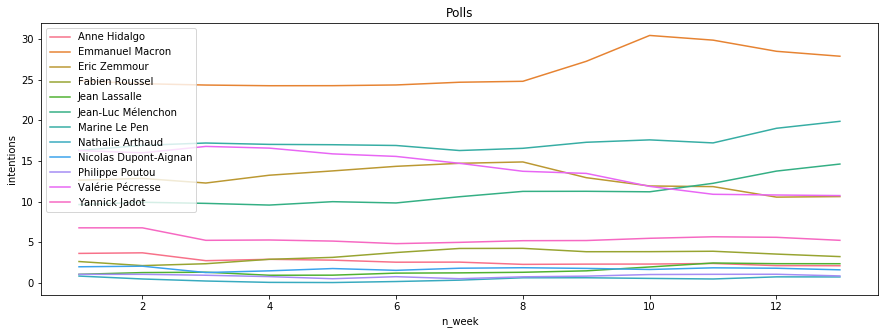

In [52]:
plt.figure(figsize = (15,5))
sns.lineplot(x="n_week", y="intentions",
             hue="candidat",data=df_util_polls)
#Changing the legend's location 
plt.legend(loc = 'upper left')
#Title:
plt.title('Polls')
plt.show()

Really smoothed??? Is that an issue???

### Saving polls

In [53]:
df_util_polls.to_csv('data/clean/df_polls.csv', index=False)